In [ ]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model 
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd

from sklearn.model_selection import LeaveOneOut
import pickle

In [ ]:
#target Julian
FILEID = "1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Data_rest_r0.zip && rm -rf /tmp/cookies.txt
!dir
!unzip Data_rest_r0.zip

--2021-02-08 20:34:51--  https://docs.google.com/uc?export=download&confirm=pWe5&id=1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3
Resolving docs.google.com (docs.google.com)... 108.177.127.113, 108.177.127.138, 108.177.127.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-c4-docs.googleusercontent.com/docs/securesc/bb6d4dls02597sjp5p3skr3roj4m9pua/4p4un6pgdapravm9jlec64pfvbplvlmj/1612816425000/13064322042220169363/00507411245101114460Z/1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3?e=download [following]
--2021-02-08 20:34:51--  https://doc-0s-c4-docs.googleusercontent.com/docs/securesc/bb6d4dls02597sjp5p3skr3roj4m9pua/4p4un6pgdapravm9jlec64pfvbplvlmj/1612816425000/13064322042220169363/00507411245101114460Z/1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3?e=download
Resolving doc-0s-c4-docs.googleusercontent.com (doc-0s-c4-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Conne

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')['Clustering']

In [ ]:
grafos[2]

(50,)

In [ ]:
def create_tensor_giga(graf,ind):
    xtensor = []
    for i in ind:
      if i>= 29 and i<34:
        subjs= graf[i-2,:]
      elif i>=34:
        subjs= graf[i-3,:]
      else:
        subjs= graf[i-1,:]

      try:
        xtensor+=[subjs]
      except:
        print('s'+str(i+1))

    xtensor= np.asarray(xtensor)
    print(xtensor.shape)
    return xtensor

# multiple por tipo de sujeto

In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')['Y']
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Global', 'Path', 'Strength', 'Y'])

In [ ]:
ventana =  0
Stren   =  grafos['Strength'][ventana]
clus    =  grafos['Clustering'][ventana]
glob    =  grafos['Global'][ventana]
path    =  grafos['Path'][ventana]

all_grafos = [Stren, clus, glob, path]
all_grafos = np.asarray(all_grafos).T

indx = np.arange(0,y.shape[0])

tip1 = 2
tip2 = 1
tip3 = 0

#newindx = indx 
#este segmento es para elegir la casificacion de cada sujeto 
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]

###index       
newindx = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2 or tipos[i]==tip3:
    newindx+= [indx[i]]
print(len(newindx))
###target
mea = y

newmea = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2 or tipos[i]==tip3 :
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)

#datos 
xtensor = []
 
for i in newindx:
  try:
    subjs = all_grafos[i,:]
    # subjs= np.asarray(subjs)
    # subjs.T.shape
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))
xtensor= np.asarray(xtensor)
xtensor.shape

50
(50, 1)


(50, 4)

In [ ]:
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,xtensor,newmea,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1864s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0225s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0370s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


(0.10168392440678425, 0.48227234527664203)


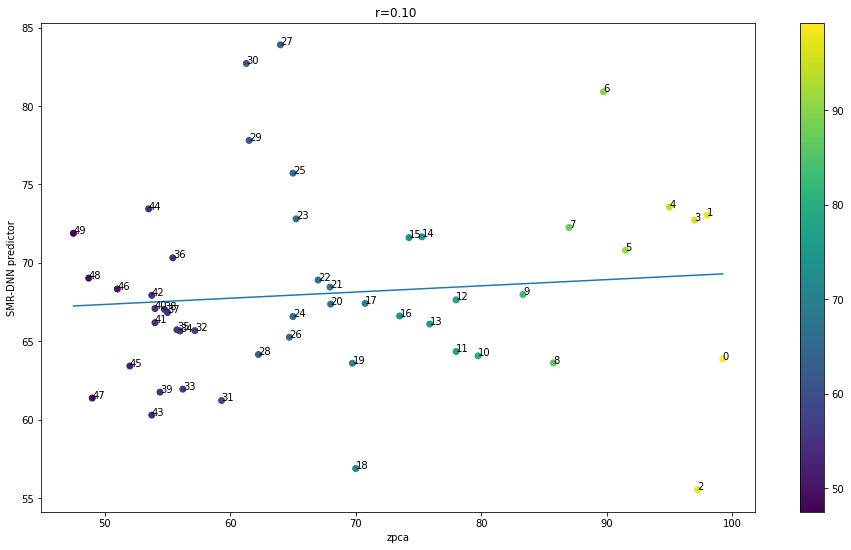

In [ ]:
indx = np.arange(0, 50)
zpca=newmea
print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()


# multiple, todas las medidas de grafos 

In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')['Y']
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Global', 'Path', 'Strength', 'Y'])

In [ ]:
ventana =  0
Stren   =  grafos['Strength'][ventana]
clus    =  grafos['Clustering'][ventana]
glob    =  grafos['Global'][ventana]
path    =  grafos['Path'][ventana]

all_grafos = [Stren, clus] #glob, path]
all_grafos = np.asarray(all_grafos).T
print(all_grafos.shape)
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,all_grafos,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   


(50, 2)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0089s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0126s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0235s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0434s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


(0.23392021833356133, 0.10204855050345776)


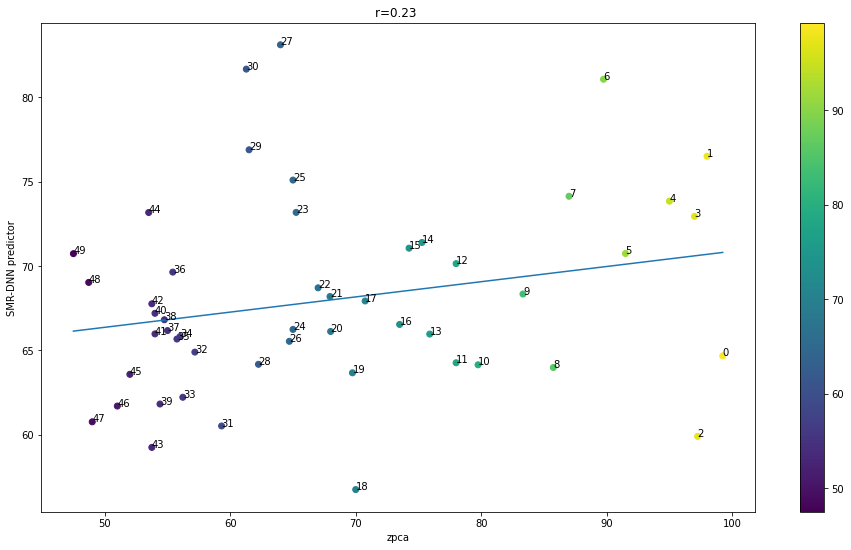

In [ ]:
indx = np.arange(0, 50)
zpca=y
print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()


# average

In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_phy.mat')
graf= grafos['Global'] #grafos[tipo de grafo][ventanas de frecuencias][valores de fecuencias] 
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_phy.mat')['Y']
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Global', 'Path', 'Strength', 'Y'])

In [ ]:
sinumbra = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_phy.mat')['Global'][1]
umbra = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v2_phy.mat')['Global'][1]

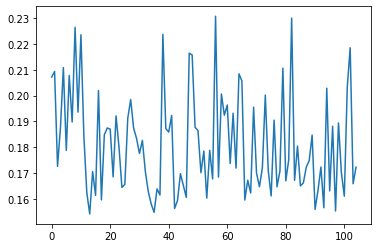

In [ ]:
plt.plot(sinumbra)

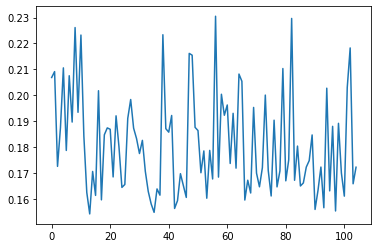

In [ ]:
plt.plot(umbra)

In [ ]:
ventana = 1
zpca=y
all_grafos = graf[ventana]
all_grafos = all_grafos.reshape(zpca.shape[0],1)
all_grafos.shape

(105, 1)

(105, 1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0081s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0193s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0226s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0259s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0555s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.2s finished


(0.15617779893079622, 0.11161666338716202)


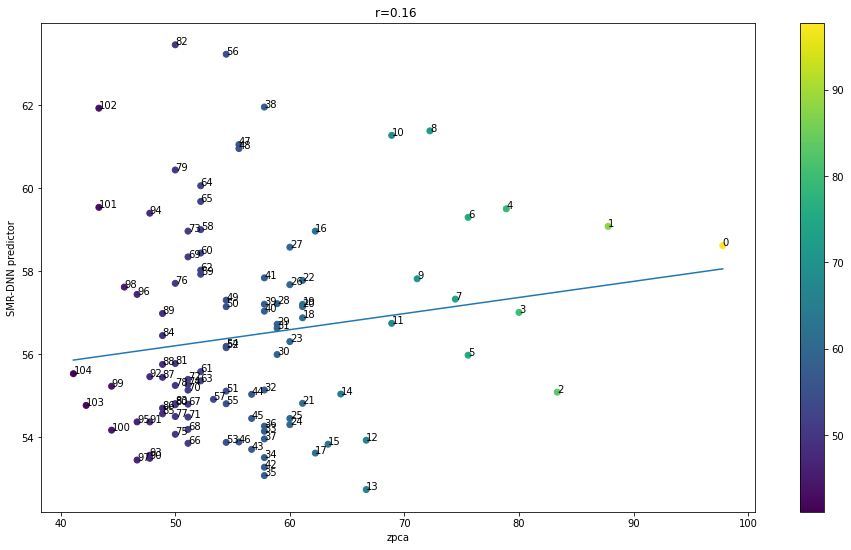

In [ ]:
ventana = 1
zpca=y
all_grafos = graf[ventana]
all_grafos = all_grafos.reshape(zpca.shape[0],1)

print(all_grafos.shape)
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,all_grafos,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   
indx = np.arange(0, all_grafos.shape[0])

print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

# Best Channel

In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_phy_ch.mat')
graf=grafos['Clustering'] #, 'Clustering', 'Strength'
#grafos['Clustering'][0][channels][frecuencias], 0 = theta, 1 = alpha o mu, 2 = beta low, 3 = beta mid, 4 = beta high
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v2_phy.mat')['Y'] 
grafos.keys()


dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Strength'])

In [ ]:
graf[0].shape

(64,)

In [ ]:
#ventana = 1
zpca=y


for ventana in range(0,3):
  pearson= []
  steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]
  pipeline = Pipeline(steps)  
#graf[0][channel][ventana].shape
  for channel in range(graf[0].shape[0]):
    all_grafos = graf[0][channel][ventana]
    all_grafos = all_grafos.reshape(zpca.shape[0],1)
    print(all_grafos.shape)
    ypred    = cross_val_predict(pipeline,all_grafos,y,cv=LeaveOneOut(),verbose=0,n_jobs=-1)
    #print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))
    pearson+= [pearsonr(zpca.reshape(-1),ypred.reshape(-1))] 


  pearson=np.asarray(pearson)
  r=pearson[:,0]
  
  np.max (r)
  print(pearson.shape) 
  print('ventana', ventana, '=',pearson[np.where(r == np.amax(r)),:])

(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(64, 2)
ventana 0 = [[[0.23137708 0.01755607]]]
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1)
(105, 1

# multivariada 


(todos los canales), 


In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga_ch.mat')
graf=grafos['Strength'] #, 'Clustering', 'Strength'
#grafos['Clustering'][0][channels][frecuencias], 0 = theta, 1 = alpha o mu, 2 = beta low, 3 = beta mid, 4 = beta high
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')['Y'] 
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Strength'])

In [ ]:
tamañoX = graf[0].shape[0]
frec       = 0
all_grafos = []
for channel in range(0, tamañoX):
  freuenciasxcanal = graf[0][channel][frec]
  all_grafos+= [freuenciasxcanal]
all_grafos=np.asarray(all_grafos).T 
print(all_grafos.shape, y.shape)

(50, 64) (50, 1)


In [ ]:
print(all_grafos.shape)
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,all_grafos,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   

(50, 64)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0154s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0144s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0383s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0309s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


(0.5679156613396306, 1.6961670056143013e-05)


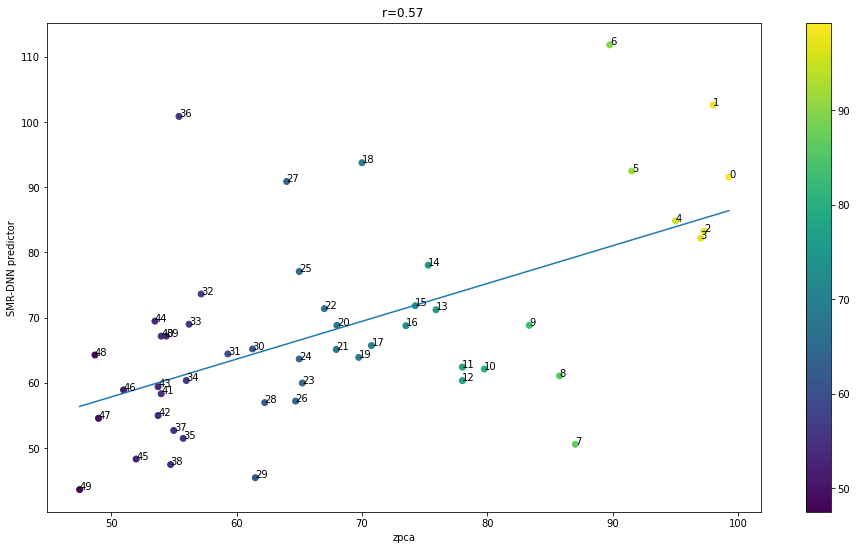

In [ ]:
indx = np.arange(0, all_grafos.shape[0])
zpca=y
print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

# multivariada por tipo de sujeto

In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga_ch.mat')
graf=grafos['Strength'] #, 'Clustering', 'Strength'
#grafos['Clustering'][0][channels][frecuencias], 0 = theta, 1 = alpha o mu, 2 = beta low, 3 = beta mid, 4 = beta high
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')['Y'] 
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Strength'])

In [ ]:
ventana =  0
indx = np.arange(0,y.shape[0])

tip1 = 0
tip2 = 1
tip3 = 2

tamañoX = graf[0].shape[0]
frec       = 0
all_grafos = []
for channel in range(0, tamañoX):
  freuenciasxcanal = graf[0][channel][frec]
  all_grafos+= [freuenciasxcanal]
all_grafos=np.asarray(all_grafos).T 
print(all_grafos.shape, y.shape)

#newindx = indx 
#este segmento es para elegir la casificacion de cada sujeto 
# tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#          0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#          1, 1, 1, 1, 1, 1]

tipos = [4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]

###index       
newindx = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2 or tipos[i]==tip3:
    newindx+= [indx[i]]
print(len(newindx))
###target
mea = y

newmea = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2 or tipos[i]==tip3 :
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)

#datos 
xtensor = []
 
for i in newindx:
  try:
    subjs = all_grafos[i,:]
    # subjs= np.asarray(subjs)
    # subjs.T.shape
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))
xtensor= np.asarray(xtensor)
xtensor.shape

(50, 64) (50, 1)
43
(43, 1)


(43, 64)

In [ ]:
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,xtensor,newmea,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0071s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0107s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0409s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0506s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.1s finished


(-0.21592238921754245, 0.16433382019607798)


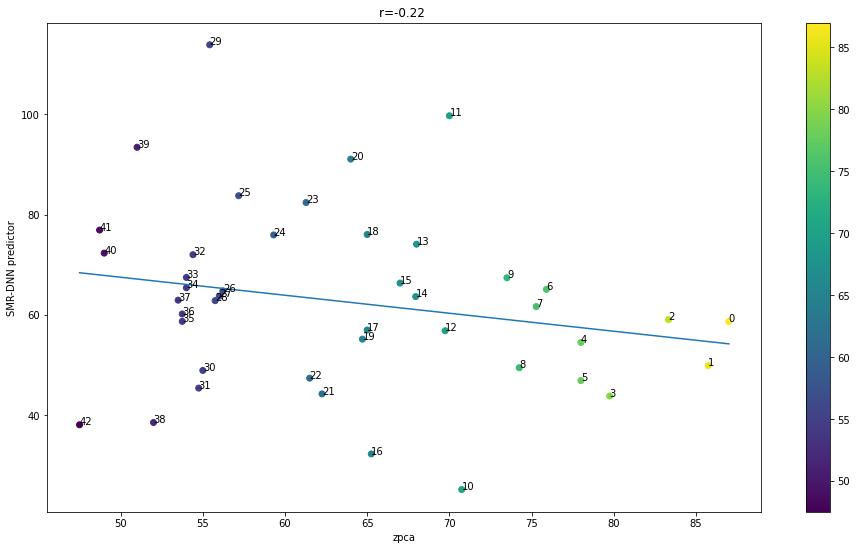

In [ ]:
indx = np.arange(0, 50)
zpca=newmea
print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()


# Multiple multivariada! 
concatenar matrices y vectores! 
sujetos x matrices - vectores


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
grafos1=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v2_phy_ch.mat')
#grafos['Clustering'][0][channels][frecuencias], 0 = theta, 1 = alpha o mu, 2 = beta low, 3 = beta mid, 4 = beta high
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v2_phy.mat')['Y'] 
grafos1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Strength'])

In [ ]:
banda = 2

grafstre=grafos1['Strength']
tamañoX = grafstre[0].shape[0]

all_channels_stre = []
for channel in range(0, tamañoX):
  freuenciasxcanal = grafstre[0][channel][banda]
  all_channels_stre+= [freuenciasxcanal]
all_channels_stre=np.asarray(all_channels_stre).T 
print(all_channels_stre.shape)

## agrupar Clustering por canales 
grafclus=grafos1['Clustering']
all_channels_clus = []
for channel in range(0, tamañoX):
  freuenciasxcanal = grafclus[0][channel][banda]
  all_channels_clus += [freuenciasxcanal]
all_channels_clus =np.asarray(all_channels_clus ).T 
print(all_channels_clus .shape)


multiplemultivariada = np.concatenate((all_channels_clus, all_channels_stre),axis = 1 )
multiplemultivariada.shape

##### definir regresion y leave one out

steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,multiplemultivariada,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   

###### resultados
# indx = np.arange(0, all_grafos.shape[0])
zpca=y

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))
# print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
# print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))

(105, 64)
(105, 64)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0141s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0340s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0508s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0830s.) Setting batch_size=16.


(0.0007409995797362098, 0.9940142506762494)


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1309s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.5s finished


In [ ]:
## agrupar global y path
ventana =  2
glob    =  grafos2['Global'][ventana]
path    =  grafos2['Path'][ventana]

all_grafos = [glob, path]
all_grafos = np.asarray(all_grafos).T
print(all_grafos.shape)
# agrupar Strength por canales

grafstre=grafos1['Strength']
tamañoX = grafstre[0].shape[0]
frec       = ventana
all_channels_stre = []
for channel in range(0, tamañoX):
  freuenciasxcanal = grafstre[0][channel][frec]
  all_channels_stre+= [freuenciasxcanal]
all_channels_stre=np.asarray(all_channels_stre).T 
print(all_channels_stre.shape)

## agrupar Clustering por canales 
grafclus=grafos1['Clustering']
all_channels_clus = []
for channel in range(0, tamañoX):
  freuenciasxcanal = grafclus[0][channel][frec]
  all_channels_clus += [freuenciasxcanal]
all_channels_clus =np.asarray(all_channels_clus ).T 
print(all_channels_clus .shape)

multiplemultivariada = np.concatenate((all_grafos, all_channels_clus, all_channels_stre),axis = 1 )
print(multiplemultivariada.shape)

steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,multiplemultivariada,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   

NameError: ignored

In [ ]:
indx = np.arange(0, all_grafos.shape[0])
zpca=y
print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

# Multichannel


In [ ]:
def create_tensor_giga(graf,ind):
    xtensor = []
    for i in ind:
      if i>= 29 and i<34:
        subjs= graf[i-2,:]
      elif i>=34:
        subjs= graf[i-3,:]
      else:
        subjs= graf[i-1,:]

      try:
        xtensor+=[subjs]
      except:
        print('s'+str(i+1))

    xtensor= np.asarray(xtensor)
    print(xtensor.shape)
    return xtensor

In [ ]:
grafos    = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga_ch.mat')
grafstre  = grafos['Strength'] #, 'Clustering', 'Strength'
grafclus  = grafos['Clustering']
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
yfrank = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')['Y'] 

#grafos['Clustering'][0][channels][frecuencias], 0 = theta, 1 = alpha o mu, 2 = beta low, 3 = beta mid, 4 = beta high
y         =loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')['Y'] 
grafos.keys()

In [ ]:
tamañoX = graf[0].shape[0]
frec       = 0

grafstre_order = []
for channel in range(0, tamañoX):
  freuenciasxcanal = grafstre[0][channel][frec]
  grafstre_order+= [freuenciasxcanal]
grafstre_order=np.asarray(grafstre_order).T 
print(grafstre_order.shape, y.shape)

#grafstre_order = create_tensor_giga(grafstre_order, indx)


In [ ]:
x = grafstre_order
y = yfrank
print(all_grafos.shape)
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,x,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)  

print(pearsonr(y.reshape(-1),ypred.reshape(-1)))
_, _, r_value, _, _ = linregress(y.reshape(-1),ypred.reshape(-1)) 

# correlaciones en conectividad WPLI

In [ ]:
FILEID = "1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O grafos_suxchaxfre.zip && rm -rf /tmp/cookies.txt
!dir
!unzip grafos_suxchaxfre.zip

In [ ]:
FILEID = "1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O conectividad_frank.zip && rm -rf /tmp/cookies.txt
!dir
!unzip conectividad_frank.zip

## multichannel

### Giga

In [ ]:
y     = pickle.load( open( "giga_y.pickle", "rb" ) )

indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
indx.shape
mea = loadmat('Data_resting_C3andC4.mat')['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(mea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape

In [ ]:
x = loadmat('Conectividad_wpli_Gigascience.mat')
frank_conect= x['Cxa'][:,:,[0,1,3]]
for Frec in [0,1,2]:
  grafstre_order = create_tensor_giga(frank_conect, indx)
  frank_conect[:,:,Frec].shape

  x = grafstre_order[:,:,Frec]
  y = zpca
  print(x.shape)
  steps = [('zscore', StandardScaler()), 
            ('linear', LinearRegression())]

  pipeline = Pipeline(steps)   
  ypred    = cross_val_predict(pipeline,x,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)  

  print(pearsonr(y.reshape(-1),ypred.reshape(-1)))
  _, _, r_value, _, _ = linregress(y.reshape(-1),ypred.reshape(-1)) 

### physionet






In [ ]:
x = loadmat('Conectividad_wpli_physionet.mat')
mea = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v2_phy.mat')['Y'] 
frank_conect= x['Cxa'][:,:,[0,1,3]] # [sujetos x caracteristica x frec (theta, mu , beta low y beta all)]
indx = np.arange(0,len(frank_conect))

In [ ]:
frank_conect= x['Cxa'][:,:,[0,1,3]]
for Frec in [0,1,2]:
  

  x = frank_conect[:,:,Frec]
  y = mea
  print(x.shape)
  steps = [('zscore', StandardScaler()), 
            ('linear', LinearRegression())]

  pipeline = Pipeline(steps)   
  ypred    = cross_val_predict(pipeline,x,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)  

  print(pearsonr(y.reshape(-1),ypred.reshape(-1)))
  _, _, r_value, _, _ = linregress(y.reshape(-1),ypred.reshape(-1)) 

## averague

### giga

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
indx.shape
mea = loadmat('Data_resting_C3andC4.mat')['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(mea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape

In [ ]:
x = loadmat('Conectividad_wpli_Gigascience.mat')
frank_conect= np.mean(x['Cxa'][:,:,[0,1,3]], axis = 1)

frank_conect.shape

In [ ]:
x = loadmat('Conectividad_wpli_Gigascience.mat')
frank_conect= np.mean(x['Cxa'][:,:,[0,1,3]], axis = 1)
for Frec in [0,1,2]:
  grafstre_order = create_tensor_giga(frank_conect, indx)
  

  x = grafstre_order[:,Frec]
  y = zpca
  print(x.shape)
  steps = [('zscore', StandardScaler()), 
            ('linear', LinearRegression())]

  pipeline = Pipeline(steps)   
  ypred    = cross_val_predict(pipeline,x.reshape(-1,1),y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)  

  print(pearsonr(y.reshape(-1),ypred.reshape(-1)))
  _, _, r_value, _, _ = linregress(y.reshape(-1),ypred.reshape(-1)) 

### physionet

In [ ]:
x = loadmat('Conectividad_wpli_physionet.mat')
mea = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v2_phy.mat')['Y'] 
frank_conect= x['Cxa'][:,:,[0,1,3]] # [sujetos x caracteristica x frec (theta, mu , beta low y beta all)]
indx = np.arange(0,len(frank_conect))

In [ ]:
frank_conect= np.mean(x['Cxa'][:,:,[0,1,3]], axis = 1)
for Frec in [0,1,2]:
  x = frank_conect[:,Frec]
  y = mea
  print(x.shape)
  steps = [('zscore', StandardScaler()), 
            ('linear', LinearRegression())]

  pipeline = Pipeline(steps)   
  ypred    = cross_val_predict(pipeline,x.reshape(-1,1),y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)  

  print(pearsonr(y.reshape(-1),ypred.reshape(-1)))
  _, _, r_value, _, _ = linregress(y.reshape(-1),ypred.reshape(-1)) 

## best channel

### giga

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
indx.shape
mea = loadmat('Data_resting_C3andC4.mat')['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(mea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape
x = loadmat('Conectividad_wpli_Gigascience.mat')
frank_conect= np.mean(x['Cxa'][:,:,[0,1,3]], axis = 1)

In [ ]:
#ventana = 1
zpca=y
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]
pipeline = Pipeline(steps) 

for ventana in range(0,3):
  pearson= []
#graf[0][channel][ventana].shape
  for channel in range(frank_conect.shape[0]):
    all_grafos = frank_conect[channel,] graf[0][channel][ventana]
    all_grafos = all_grafos.reshape(zpca.shape[0],1)
    print(all_grafos.shape)
    ypred    = cross_val_predict(pipeline,all_grafos,y,cv=LeaveOneOut(),verbose=0,n_jobs=-1)
    #print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))
    pearson+= [pearsonr(zpca.reshape(-1),ypred.reshape(-1))] 


  pearson=np.asarray(pearson)
  r=pearson[:,0]
  
  np.max (r)
  print(pearson.shape) 
  print('ventana', ventana, '=',pearson[np.where(r == np.amax(r)),:])

# correlacion en conectividad plv

In [ ]:
#conectividades con algoritmo daniel
FILEID = "1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O connectividades_daniel.zip && rm -rf /tmp/cookies.txt
!dir
!unzip connectividades_daniel.zip

--2021-01-17 20:25:51--  https://docs.google.com/uc?export=download&confirm=&id=1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch
Resolving docs.google.com (docs.google.com)... 172.217.204.102, 172.217.204.100, 172.217.204.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-b4-docs.googleusercontent.com/docs/securesc/cme1vbu3h6asdqtddsl8l7k6808922pj/p9huplt4g6sj1ck1nlk5bq2h8aunuoru/1610915100000/17600740636788319470/00203586816516288302Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download [following]
--2021-01-17 20:25:53--  https://doc-0o-b4-docs.googleusercontent.com/docs/securesc/cme1vbu3h6asdqtddsl8l7k6808922pj/p9huplt4g6sj1ck1nlk5bq2h8aunuoru/1610915100000/17600740636788319470/00203586816516288302Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download
Resolving doc-0o-b4-docs.googleusercontent.com (doc-0o-b4-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connectin

## Multichannel

### Giga

In [ ]:
y     = pickle.load( open( "giga_y.pickle", "rb" ) )

indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
indx.shape
mea = loadmat('Data_resting_C3andC4.mat')['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(mea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape

In [ ]:
x = pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )
frank_conect = x[:,:,:,0]
frank_conect.shape

In [ ]:
x = pickle.load( open( "connectividad_daniel_giga_3bandas.pickle", "rb" ) )
frank_conect = x[:,:,:,0]
for Frec in [0,1,2]:
  grafstre_order = create_tensor_giga(frank_conect, indx)
  frank_conect[:,:,Frec].shape

  x = grafstre_order[:,:,Frec]
  y = zpca
  print(x.shape)
  steps = [('zscore', StandardScaler()), 
            ('linear', LinearRegression())]

  pipeline = Pipeline(steps)   
  ypred    = cross_val_predict(pipeline,x,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)  

  print(pearsonr(y.reshape(-1),ypred.reshape(-1)))
  _, _, r_value, _, _ = linregress(y.reshape(-1),ypred.reshape(-1)) 

### physionet






In [ ]:
from sklearn.preprocessing import MinMaxScaler
##cargar conectividad
conect_PLV= pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )[:,:,:,0]

## definir target y cargar datos
##cargar datos csp e indx
load = pickle.load( open( "/content/drive/MyDrive/CX_Regression/codigos/physionet/targets_physionet/target_phy_2seg_5time_2frec.p", "rb" ) )
indx = load['indx']
indx2=[int(indx[i][1::]) for i in range(len(indx))]
### fix target 
target = np.asarray(load['acc_subj'])

mea = target[np.argsort(indx2)]


sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea.reshape(-1, 1))

#indx = np.arange(1,106)

In [ ]:
x = pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )
mea = np.delete(mea,103)
#mea = pickle.load( open( "/content/phy_y.pickle", "rb" ) )


In [ ]:
x = pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )
frank_conect = x[:,:,:,0]

for Frec in [0,1,2]:
  x = frank_conect[:,:,Frec]
  y = mea
  print(x.shape)
  steps = [('zscore', StandardScaler()), 
            ('linear', LinearRegression())]

  pipeline = Pipeline(steps)   
  ypred    = cross_val_predict(pipeline,x,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)  

  print(pearsonr(y.reshape(-1),ypred.reshape(-1)))
  _, _, r_value, _, _ = linregress(y.reshape(-1),ypred.reshape(-1)) 

(105, 2016)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1884s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1301s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0507s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 

(0.09466143304313519, 0.3367840795557057)
(105, 2016)


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0553s.) Setting batch_size=2.


(0.34554217141960314, 0.0003059165985321434)
(105, 2016)


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1448s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.1s


(0.3224974845310654, 0.0007931521116684555)


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    2.3s finished


## averague

### giga

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
indx.shape
mea = loadmat('Data_resting_C3andC4.mat')['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(mea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape

In [ ]:
x = pickle.load( open( "connectividad_daniel_giga_3bandas.pickle", "rb" ) )
frank_conect = x[:,:,:,0]

In [ ]:
x = pickle.load( open( "connectividad_daniel_giga_3bandas.pickle", "rb" ) )
frank_conect= np.mean(x[:,:,:,0], axis = 1)
for Frec in [0,1,2]:
  grafstre_order = create_tensor_giga(frank_conect, indx)
  

  x = grafstre_order[:,Frec]
  y = zpca
  print(x.shape)
  steps = [('zscore', StandardScaler()), 
            ('linear', LinearRegression())]

  pipeline = Pipeline(steps)   
  ypred    = cross_val_predict(pipeline,x.reshape(-1,1),y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)  

  print(pearsonr(y.reshape(-1),ypred.reshape(-1)))
  _, _, r_value, _, _ = linregress(y.reshape(-1),ypred.reshape(-1)) 

### physionet

In [ ]:
from sklearn.preprocessing import MinMaxScaler
##cargar conectividad
conect_PLV= pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )[:,:,:,0]

## definir target y cargar datos
##cargar datos csp e indx
load = pickle.load( open( "/content/drive/MyDrive/CX_Regression/codigos/physionet/targets_physionet/target_phy_2seg_5time_2frec.p", "rb" ) )
indx = load['indx']
indx2=[int(indx[i][1::]) for i in range(len(indx))]
### fix target 
target = np.asarray(load['acc_subj'])

mea = target[np.argsort(indx2)]


sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea.reshape(-1, 1))

#indx = np.arange(1,106)

In [ ]:
x = pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )
mea = np.delete(mea,103)
#mea = pickle.load( open( "/content/phy_y.pickle", "rb" ) )


In [ ]:
frank_conect= np.mean(x[:,:,:,0], axis = 1)
for Frec in [0,1,2]:
  x = frank_conect[:,Frec]
  y = mea
  print(x.shape)
  steps = [('zscore', StandardScaler()), 
            ('linear', LinearRegression())]

  pipeline = Pipeline(steps)   
  ypred    = cross_val_predict(pipeline,x.reshape(-1,1),y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)  

  print(pearsonr(y.reshape(-1),ypred.reshape(-1)))
  _, _, r_value, _, _ = linregress(y.reshape(-1),ypred.reshape(-1)) 

(105,)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1982s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0110s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0160s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0351s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0563s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurre

(0.1369362784297497, 0.16363375552602794)
(105,)


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0085s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0134s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0215s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0199s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0543s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    0.2s


(0.1952376102037202, 0.04594555650333797)
(105,)
(0.15210066655693327, 0.12139660134587878)


[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.2s finished
